# 0. 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from tqdm import tqdm
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family = font_name)

# 마이너스 사인 해결
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

- 분석의 목적
    - 신규자격/자격유지 검사 테스트 결과를 토대로 교통사고 위험군이 될 사람을 에측하는 AI모델 제작

# 1. 데이터 불러오기

## 가. EDA
- A(신규자격)
    - 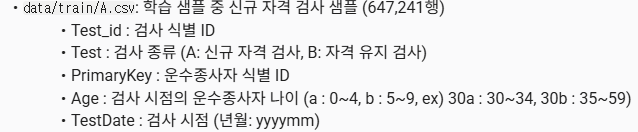
- B(자격유지)
    - 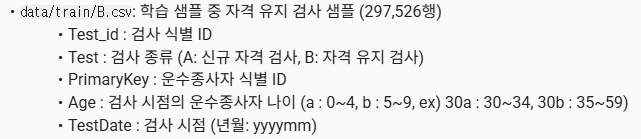

### 1) A검사(신규자격)
- 각 테스트 항목(A1, A2 등)마다 지정된 측정횟수가 존재
- 테스트 항목 컬럼에 데이터의 값이 ','구분 형태로 여러개의 원자값을 보유
    - AI활용을 위해 분해하거나 수치에 기반한 특정값으로 대체를 하는 등 데이터 가공 필요
- A1 ~ A7 측정항목 : 각 측정별 세부 측정항목이 있지만 대부분 조건등이 기록된 것이고, 실제 평가기준에 의거한 항목을 학습에 사용(ex : A1검사는 A1-3만 사용)
    - A1-3, A2-3, A3-5, A3-7, A4-3, A4-5, A5-2, A6-1, A7-1
- A8, A9 측정항목 : 정성적인 응답에 대한 정답 트리거 갯수 합산 또는 점수 계산으로 판단, 그대로 사용
    - A8-1 ~ 2, A9-1 ~ 
    
- 각 검사항목에 대해 단순히 합산 적용하지 말고, 반응횟수에 대한 평균 반응시간의 비율을 본다거나, A9 질문지형 검사에 대해 서로의 상관성 분석을 통해 측정항목에 대해 더하고 나누는 비율 조정으로 피처 엔지니어링을 추가적으로 수행

In [2]:
# A(신규자격) Train 데이터 확인
train_root_dir = './data/train'
train_a_df = pd.read_csv(os.path.join(train_root_dir, 'A.csv'))

In [3]:
train_a_df

,Test_id,Test,PrimaryKey,Age,TestDate,A1-1,A1-2,A1-3,A1-4,A2-1,...,A5-3,A6-1,A7-1,A8-1,A8-2,A9-1,A9-2,A9-3,A9-4,A9-5
0,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,A,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,60a,201801,"2,2,1,1,1,2,1,1,2,2,1,2,2,2,2,1,1,1","2,1,2,2,1,2,2,3,1,1,1,3,3,3,2,3,1,3","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-32,42,10,-6,-11,-20,-80,-54,16,-4,14,33,50,8,...","0,0,2,3,3,3,2,1,2,2,1,2,1,3,3,3,2,1",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",5,10,6,1,4,11,1,6,5
1,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,A,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,40a,201801,"1,1,1,2,1,2,2,2,1,1,1,2,2,1,2,2,1,2","2,1,3,2,3,2,1,3,1,1,2,1,2,3,3,3,2,1","1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","636,9,-3,-26,-3,-21,29,0,14,39,44,29,81,22,0,-...","0,0,2,2,1,3,3,2,2,3,1,1,1,3,2,2,3,1",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",12,17,8,4,9,13,2,20,6
2,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,A,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,30b,201801,"1,2,1,1,2,1,1,1,2,1,2,2,1,2,1,2,2,2","3,1,2,2,3,3,1,1,3,3,2,1,1,1,2,3,2,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","13,-34,4,-23,-25,-54,14,-37,-102,-79,-60,3,-11...","0,0,2,2,1,1,3,1,1,3,1,3,3,2,3,2,3,2",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",10,14,0,1,6,2,0,0,2
3,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,A,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,50a,201801,"2,2,2,2,2,1,1,1,1,1,2,1,2,1,1,2,1,2","1,1,3,2,3,3,1,3,1,2,2,3,1,1,2,3,2,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-25,-8,102,13,0,-54,-49,-62,13,-57,-26,-54,-89...","0,2,2,1,3,3,1,1,3,3,3,2,2,3,1,2,1,3",...,"1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,0,...",10,7,7,2,21,15,3,17,13
4,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,A,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,50a,201801,"2,1,2,2,2,2,1,1,1,2,2,1,1,1,1,2,1,2","2,1,2,2,3,1,2,3,3,1,1,2,2,1,1,3,3,3","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-9,-37,-55,-3,-25,-21,-6,48,56,16,-47,-12,50,3...","0,0,2,1,2,2,3,3,1,3,2,1,3,2,2,1,3,3",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",11,15,3,0,6,18,7,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647236,0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...,A,0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...,40a,202212,"1,2,2,2,1,1,1,1,2,2,1,1,1,1,2,2,2,2","3,1,2,3,3,2,2,1,1,2,2,1,1,3,3,1,3,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-3,-34,-9,8,22,-29,-23,1,4,30,-23,39,26,-80,-5...","0,0,1,2,1,1,2,3,3,2,3,3,1,1,2,1,2,2",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",13,16,1,1,9,12,3,7,5
647237,0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...,A,0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...,30b,202212,"1,1,1,2,1,2,2,2,1,1,2,1,2,1,2,1,2,2","1,3,1,3,3,2,2,1,1,3,3,2,1,2,1,2,3,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","9,22,1,-25,56,-26,-9,-47,26,-3,0,-29,-34,21,-2...","0,1,2,3,2,2,2,3,1,3,3,3,3,2,1,2,1,3",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...",14,15,6,0,4,9,0,8,5
647238,0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...,A,0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...,30b,202212,"1,1,1,2,2,2,2,1,1,2,2,1,1,2,1,2,2,1","2,1,3,2,1,3,3,1,1,2,2,3,2,3,3,1,1,2","0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1","-52,-37,722,-3,-60,-77,0,594,594,638,638,5,-63...","0,2,1,1,2,2,1,3,3,3,3,2,1,1,3,2,2,2",...,"0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",13,18,0,0,0,0,0,0,0
647239,0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...,A,0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...,40a,202212,"2,1,1,1,2,1,2,2,1,1,2,1,1,2,2,2,2,1","1,1,2,3,3,2,2,2,1,3,3,2,1,2,1,1,3,3","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-42,18,-23,-54,-42,-23,-3,-21,18,-28,-68,27,18...","0,1,3,1,3,3,1,1,2,2,3,2,3,1,2,3,2,2",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",10,9,7,0,4,9,0,6,3


In [4]:
train_a_df.info()
# 데이터 647241개 중 일부 시험항목에 null값이 1개씩 없는것으로 확인
# 추후 처리 : 데이터의 수가 많아서 일괄 삭제해도 분석결과에 크게 영향 없을것으로 판단(but, 시간여유가 되면 대체방안에 대해서도 생각)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647241 entries, 0 to 647240
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Test_id     647241 non-null  object
 1   Test        647241 non-null  object
 2   PrimaryKey  647241 non-null  object
 3   Age         647241 non-null  object
 4   TestDate    647241 non-null  int64 
 5   A1-1        647241 non-null  object
 6   A1-2        647241 non-null  object
 7   A1-3        647241 non-null  object
 8   A1-4        647241 non-null  object
 9   A2-1        647241 non-null  object
 10  A2-2        647241 non-null  object
 11  A2-3        647241 non-null  object
 12  A2-4        647240 non-null  object
 13  A3-1        647240 non-null  object
 14  A3-2        647240 non-null  object
 15  A3-3        647240 non-null  object
 16  A3-4        647240 non-null  object
 17  A3-5        647240 non-null  object
 18  A3-6        647241 non-null  object
 19  A3-7        647240 non-

In [5]:
train_a_df.loc[train_a_df['A2-4'].isnull()==True,'A2-4']

426168    NaN
Name: A2-4, dtype: object

In [6]:
# train_a_df.iloc[426168]
print(train_a_df.iloc[426168,5:])
print("-"*100)
print(train_a_df.iloc[426168,5:].apply(lambda x : len(x.split(',')) if isinstance(x, str) else 0))
# 각 시험항목별 데이터의 갯수는 각 시험측정에 필요한 지정되니 측정횟수(ex : a1시험 : 총 18회 측정)
# 일부 측정항목에서 null값이 1개씩 존재하는 것으로 확인

A1-1                  1,2,1,2,2,1,2,1,2,2,1,1,1,1,2,2,1,2
A1-2                  3,2,3,2,1,2,2,1,1,3,1,3,1,2,1,3,2,3
A1-3                  0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A1-4    14,-61,-54,638,-94,-29,-26,-50,-102,0,-118,-3,...
A2-1                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2-2                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2-3                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2-4                                                  NaN
A3-1    1,2,2,2,1,2,2,2,1,2,1,2,2,1,1,2,2,2,1,1,1,1,1,...
A3-2    8,5,3,7,6,1,3,3,8,1,2,7,5,6,8,7,7,5,4,2,4,4,8,...
A3-3    2,2,2,1,2,2,1,2,1,1,2,2,1,2,2,1,2,1,2,2,2,1,1,...
A3-4    8,5,3,7,6,1,3,2,8,1,4,7,5,7,8,7,2,4,4,7,4,4,8,...
A3-5    1,1,1,1,1,1,1,3,1,1,3,1,1,3,1,1,3,3,1,3,1,1,1,...
A3-6    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
A3-7    1250,2135,1167,733,1518,2402,1668,1368,1818,20...
A4-1    2,2,2,2,2,1,2,1,1,2,2,2,2,1,1,1,1,1,1,2,1,1,2,...
A4-2    2,1,1,1,2,1,2,1,1,2,2,1,1,2,1,1,1,2,1,1,1,2,1,...
A4-3    1,1,1,

In [7]:
print(train_a_df['A1-3'])
print("-"*100)
print(train_a_df['A2-3'])

0         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1         1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                         ...                 
647236    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
647237    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
647238    0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1
647239    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
647240    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Name: A1-3, Length: 647241, dtype: object
----------------------------------------------------------------------------------------------------
0         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
                         ...                 
647236    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
647237    0,0,0,0,0,0,0,0,0,0

In [8]:
print(train_a_df['A8-1'])
print("-"*100)
print(train_a_df['A9-1'])

0         6
1         8
2         0
3         7
4         3
         ..
647236    1
647237    6
647238    0
647239    7
647240    6
Name: A8-1, Length: 647241, dtype: int64
----------------------------------------------------------------------------------------------------
0          4
1          9
2          6
3         21
4          6
          ..
647236     9
647237     4
647238     0
647239     4
647240     6
Name: A9-1, Length: 647241, dtype: int64


### 2) B검사(자격유지) 
- A검사와 마찬가지로 각 테스트 항목마다 지정된 측정횟수가 존재
- 테스트 항목 컬럼에 데이터의 값이 ','구분 형태로 여러개의 원자값을 보유
    - AI활용을 위해 분해하거나 수치에 기반한 특정값으로 대체를 하는 등 데이터 가공 필요
- B1, B2 측정 : 정/오 응답 갯수 사용(B1-1, B1-3, B2-1, B2-3)
- B3 측정 : B3-1(정답갯수), B3-2(반응시간 평균)
- B4 측정 : B4-1(정답갯수) 
- B5 ~ B8 측정 : 정/오 정답만(B5-1, B6, B7, B8)
- B9, B10 측정 : '7'에 버튼을 누른 횟수와 장애물에 부딪히지 않은 횟수, 색깔에 맞춰 동일한 색 버튼을 누른 횟수 등 정답에 초점을 둘지 오답에 초점을 둘지 생각해볼 문제


In [9]:
# B(자격유지) Train 데이터 확인
train_root_dir = './data/train'
train_b_df = pd.read_csv(os.path.join(train_root_dir, 'B.csv'))

In [10]:
train_b_df

,Test_id,Test,PrimaryKey,Age,TestDate,B1-1,B1-2,B1-3,B2-1,B2-2,...,B9-2,B9-3,B9-4,B9-5,B10-1,B10-2,B10-3,B10-4,B10-5,B10-6
0,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,B,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0.03798499,0,0.5811322,0,0,0.5803714,1.00910...","3,1,4,1,3,4,1,1,3,1,4,1,1,1,3,4","1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1","0.8907053,0,0,0,0,1.040678,0.6199818,0,0,0.657...",...,0,0,35,1,20,0,3,57,7,15
1,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,B,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,60b,201602,"1,2,2,2,2,2,1,2,2,2,1,1,1,1,1,1","0,0,0,0.1280282,0,0,0.9760087,0.03197882,0,0.0...","4,4,3,1,4,2,1,1,4,1,4,1,3,3,1,1","1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",...,0,0,35,2,19,1,1,59,10,19
2,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,B,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,70a,201602,"1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1","0.5967258,0,0,0,0,0,0.7050578,0.6730202,0,0.83...","1,4,4,2,4,3,1,1,4,1,1,3,1,3,4,1","2,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1","0,0.7690769,0,0,0.7381148,0,0,0.9290089,0,0,0....",...,0,0,35,0,18,2,0,60,5,19
3,0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...,B,0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0,0.6738921,0,0.5439928,0.5342392,0.424049...","4,4,4,1,4,1,1,1,3,1,4,1,4,4,1,1","1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1","0.5470542,0,0,0,0,0.5041592,0.542075,0,0,0.740...",...,0,0,35,6,19,1,2,58,4,20
4,0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...,B,0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0.3119312,0,0.03894603,0,0,0.03889565,0.0389...","4,1,3,1,4,3,1,1,4,1,3,1,1,1,4,3","1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.4689675,0,0,0.03903218,0,0.7800297,0,0.54600...",...,0,1,34,0,20,0,0,60,14,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297521,0xB97FB490FDDAD91CCEB7DCDDD3025025B7E749A79031...,B,0xB97FB490FDDAD91CCEB7DCDDD3025025B7E749A79031...,70a,202212,"1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1","0.8006758,0,0,0,0.9175501,0,0.8008417,0,0.9509...","1,4,4,4,1,4,1,4,1,1,4,4,1,1,1,4","1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1","0.5337561,0,0.8006437,0,0.784023,0,0,0,0,0.800...",...,0,1,34,0,20,0,2,58,2,20
297522,0x2B611168CBF7C924EC699B8DC09462C052A05B0728AB...,B,0x2B611168CBF7C924EC699B8DC09462C052A05B0728AB...,70a,202212,"1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1","0,0.5005826,0,0.6004335,0,0,0.6506259,1.034011...","4,1,4,1,4,4,1,1,4,1,4,1,1,1,4,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.4673256,0,0.517314,0,0.5003029,0,0,0.5165698...",...,0,0,35,0,20,0,0,60,1,20
297523,0x6D2AB39B75DBA32D0E5E7830F87327D22695D197A0B2...,B,0x6D2AB39B75DBA32D0E5E7830F87327D22695D197A0B2...,60b,202212,"1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1","0.7076792,0,0,0,0.9337709,0,0.9450536,0,1.0320...","1,4,4,4,1,4,1,4,1,1,4,4,1,1,1,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.6149476,0,0.9309805,0,0.9395396,0,0,0.721625...",...,0,0,35,0,20,0,0,60,0,20
297524,0xA7E84C76AB8BE5ED1F7012B5419A7FBD08D795385A16...,B,0xA7E84C76AB8BE5ED1F7012B5419A7FBD08D795385A16...,60b,202212,"1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","4,2,4,2,4,4,2,2,4,2,4,2,2,2,4,4","2,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",...,13,1,34,4,0,20,0,60,0,19


In [11]:
train_b_df.info()
# 마찬가지로 전체 297526개 데이터 중 특정 시험에서 결측치 값이 보임
# A검사와 다르게 결측치 값이 1개 보다 더 많은 측정항목이 보여 전체적으로 어느정도 데이터가 부족한지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Test_id     297526 non-null  object
 1   Test        297526 non-null  object
 2   PrimaryKey  297526 non-null  object
 3   Age         297526 non-null  object
 4   TestDate    297526 non-null  int64 
 5   B1-1        297517 non-null  object
 6   B1-2        297517 non-null  object
 7   B1-3        297517 non-null  object
 8   B2-1        297523 non-null  object
 9   B2-2        297523 non-null  object
 10  B2-3        297523 non-null  object
 11  B3-1        297523 non-null  object
 12  B3-2        297523 non-null  object
 13  B4-1        297523 non-null  object
 14  B4-2        297523 non-null  object
 15  B5-1        297523 non-null  object
 16  B5-2        297523 non-null  object
 17  B6          297523 non-null  object
 18  B7          297524 non-null  object
 19  B8          297525 non-

In [12]:
train_b_test = train_b_df.T.iloc[5:,:]
train_b_test.apply(lambda row : row.isnull().sum(), axis = 1)
# 각 측정항목별 결측치 확인

B1-1     9
B1-2     9
B1-3     9
B2-1     3
B2-2     3
B2-3     3
B3-1     3
B3-2     3
B4-1     3
B4-2     3
B5-1     3
B5-2     3
B6       3
B7       2
B8       1
B9-1     0
B9-2     0
B9-3     0
B9-4     0
B9-5     0
B10-1    0
B10-2    0
B10-3    0
B10-4    0
B10-5    0
B10-6    0
dtype: int64

In [13]:
print(train_b_df['B1-1'][0])
print("-"*100)
print(train_b_df['B1-3'][0])

1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
----------------------------------------------------------------------------------------------------
3,1,4,1,3,4,1,1,3,1,4,1,1,1,3,4


In [14]:
# B3는 반응시간도 중요함
print(train_b_df['B3-2'][0])
print("-"*100)
print(train_b_df['B4-1'][2], " / 갯수:", len(train_b_df['B4-1'][2]))

0.8169604,0.9480587,0.8458152,0.9181027,0.9304094,0.7811799,0.8138167,0.7461151,0.9210144,0.7461294,0.7942742,0.8164628,0.8533937,0.8852984,0.7833536
----------------------------------------------------------------------------------------------------
5,3,1,3,1,3,3,1,3,5,1,1,1,1,1,5,5,3,1,5,1,1,1,5,3,1,3,3,5,1,3,1,1,5,1,1,1,1,3,3,5,5,3,5,3,1,1,1,5,5,1,1,1,1,3,1,5,5,1,1  / 갯수: 119


In [15]:
# B4의 시도횟수는 60회인데 왜 119개의 데이터가 있을까? ','를 포함해서 119개였다. 실제로는 60개가 맞음
test_a = train_b_df['B4-1'][0]
print(len([i for i in test_a.split(',') if int(i) in(1, 2)]))
print([i for i in test_a.split(',') if int(i) in(1, 2)])
print("-"*100)
print(len([i for i in test_a.split(',') if int(i) in(3, 4, 5, 6)]))
print([i for i in test_a.split(',') if int(i) in(3, 4, 5, 6)])
print("-"*100)

30
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1']
----------------------------------------------------------------------------------------------------
30
['5', '5', '3', '3', '3', '3', '5', '5', '6', '5', '3', '3', '3', '5', '5', '3', '3', '3', '5', '5', '4', '5', '3', '3', '5', '5', '3', '6', '6', '3']
----------------------------------------------------------------------------------------------------


In [16]:
print(train_b_df['B9-1']) # aud, hit : 아마도 숫자 '7'이 15번 나오는 동안 제대로 버튼 누른 횟수인듯
print("-"*100)
print(train_b_df['B9-2']) # aud, miss : 이거는 '7'들렸는데 못누른 횟수인 듯

0         15
1         15
2         15
3         15
4         15
          ..
297521    15
297522    15
297523    15
297524     2
297525    15
Name: B9-1, Length: 297526, dtype: int64
----------------------------------------------------------------------------------------------------
0          0
1          0
2          0
3          0
4          0
          ..
297521     0
297522     0
297523     0
297524    13
297525     0
Name: B9-2, Length: 297526, dtype: int64


In [17]:
print(train_b_df['B9-3']) # aud, fa : 7이외 숫자에 대해 버튼 누른 횟수인듯
print("-"*100)
print(train_b_df['B9-4']) # aud, cr : 7이외 숫자에 정확하게 안누른 횟수인듯

0         0
1         0
2         0
3         0
4         1
         ..
297521    1
297522    0
297523    0
297524    1
297525    0
Name: B9-3, Length: 297526, dtype: int64
----------------------------------------------------------------------------------------------------
0         35
1         35
2         35
3         35
4         34
          ..
297521    34
297522    35
297523    35
297524    34
297525    35
Name: B9-4, Length: 297526, dtype: int64


In [18]:
print(train_b_df['B9-5']) # vis, err : 장애물 피하지 못한 횟수
print("-"*100)
print(train_b_df['B10-6']) # B10 테스트 색깔에 맞추어 정확하게 누른 횟수

0         1
1         2
2         0
3         6
4         0
         ..
297521    0
297522    0
297523    0
297524    4
297525    2
Name: B9-5, Length: 297526, dtype: int64
----------------------------------------------------------------------------------------------------
0         15
1         19
2         19
3         20
4         20
          ..
297521    20
297522    20
297523    20
297524    19
297525    19
Name: B10-6, Length: 297526, dtype: int64


### 3) EDA를 위한 데이터 전처리

#### 가) A검사 전처리

In [19]:
# 사용할 컬럼 분리
sel_column = ['Test_id', 'Test', 'PrimaryKey', 'Age', 'TestDate', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1', 'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']
sel_train_a_df = train_a_df[sel_column]
sel_train_a_df

,Test_id,Test,PrimaryKey,Age,TestDate,A1-3,A2-3,A3-6,A3-7,A4-3,...,A5-2,A6-1,A7-1,A8-1,A8-2,A9-1,A9-2,A9-3,A9-4,A9-5
0,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,A,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,60a,201801,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","2218,1268,1517,1201,967,1869,1684,2135,1368,16...","1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,1,2,2,2,1,1,1,1,1,1,1,2,2,2,1,1,1,1,2,1,...",5,10,6,1,4,11,1,6,5
1,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,A,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,40a,201801,"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","583,650,600,534,1468,700,1201,600,650,633,600,...","1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,...",12,17,8,4,9,13,2,20,6
2,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,A,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,30b,201801,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","583,534,583,600,533,583,650,884,650,951,633,12...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,2,2,2,1,1,1,1,1,2,1,1,2,2,2,1,1,1,1,2,1,...",10,14,0,1,6,2,0,0,2
3,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,A,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,50a,201801,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","1768,1785,1818,1468,1051,1668,851,2235,1468,11...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"2,2,1,2,2,2,2,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,1,...",10,7,7,2,21,15,3,17,13
4,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,A,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,50a,201801,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","2252,1368,800,1417,1117,900,851,1050,1117,851,...","1,1,1,1,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,1,1,2,1,2,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,...",11,15,3,0,6,18,7,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647236,0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...,A,0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...,40a,202212,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","1451,1101,600,1368,700,683,700,967,1568,600,11...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,2,2,2,1,1,1,...",13,16,1,1,9,12,3,7,5
647237,0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...,A,0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...,30b,202212,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","533,1518,650,583,650,583,600,1051,1418,600,600...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,2,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,2,...",14,15,6,0,4,9,0,8,5
647238,0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...,A,0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...,30b,202212,"0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","684,1618,600,601,634,600,1317,1417,700,584,850...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,...",13,18,0,0,0,0,0,0,0
647239,0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...,A,0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...,40a,202212,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","617,1051,750,817,583,767,583,550,600,550,550,5...","1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",...,"1,2,1,2,1,1,1,1,1,2,1,2,1,2,1,1

In [20]:
# 결측치 처리 (1) 단순 삭제
sel_train_a_df = sel_train_a_df.dropna()

In [21]:
sel_train_a_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 647238 entries, 0 to 647240
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Test_id     647238 non-null  object
 1   Test        647238 non-null  object
 2   PrimaryKey  647238 non-null  object
 3   Age         647238 non-null  object
 4   TestDate    647238 non-null  int64 
 5   A1-3        647238 non-null  object
 6   A2-3        647238 non-null  object
 7   A3-6        647238 non-null  object
 8   A3-7        647238 non-null  object
 9   A4-3        647238 non-null  object
 10  A4-5        647238 non-null  object
 11  A5-2        647238 non-null  object
 12  A6-1        647238 non-null  int64 
 13  A7-1        647238 non-null  int64 
 14  A8-1        647238 non-null  int64 
 15  A8-2        647238 non-null  int64 
 16  A9-1        647238 non-null  int64 
 17  A9-2        647238 non-null  int64 
 18  A9-3        647238 non-null  int64 
 19  A9-4        647238 non-null 

### ※ 전처리를 위한 함수 모음

In [22]:
# age 전처리 함수
def convert_age_to_numeric(age_str):
    if isinstance(age_str, str) and len(age_str) > 1 :
        decade = int(age_str[:-1])
        group = age_str[-1]
        if group == 'a' : return decade + 2
        elif group == 'b' : return decade + 7
    try : return int(age_str)
    except (ValueError, TypeError) : return np.nan
    
# 날짜 변환 함수
def split_date(date):
    try:
        date = int(date)
        year = str(date/100).split('.')[0]
        month = str(date/100).split('.')[1]
        return year, month
    except (ValueError, TypeError):
        return np.nan


# 데이터 평균, 표준편차, 비율 함수 정의    
def seq_ratio(seq_cont):
    try : 
        # 문자열이 아니거나 NaN이면 0.0 반환
        if not isinstance(seq_cont, str):
            return 0.0
        # split 후 빈 문자열 요소를 필터링
        items = [item for item in seq_cont.split(',') if item.strip()]
        # 필터링 후 아이템이 없으면 0.0 반환
        if not items:
            return 0.0
        # '1'인 아이템의 개수를 세어 비율 계산
        return round(items.count('1') / len(items), 2)
    except (ValueError, TypeError) as e :
        return print(f"계산 중 '{e}' 오류 발생")
    
def seq_mean(seq_cont) :
    try : 
        if not isinstance(seq_cont, str):
            return 0.0
        # split 후 빈 문자열 요소를 필터링하고 숫자로 변환
        items = [int(i.strip()) for i in seq_cont.split(',') if i.strip()]
        if not items:
            return 0.0
        return round(np.mean(items), 2)
    except (ValueError, TypeError) as e :
        return print(f"계산 중 '{e}' 오류 발생")
    
def seq_std(seq_cont) :
    try : 
        if not isinstance(seq_cont, str):
            return 0.0
        # split 후 빈 문자열 요소를 필터링하고 숫자로 변환
        items = [int(i.strip()) for i in seq_cont.split(',') if i.strip()]
        if not items:
            return 0.0
        return round(np.std(items), 2)
    except (ValueError, TypeError) as e :
        return print(f"계산 중 '{e}' 오류 발생")
    
    
# 2개 특정 조건(condition)에 따른 반응비율, 반응시간 평균/표준편차
def condition_2_resp_calculate(df : pd.DataFrame, 
                             feature1 : str, 
                             feature2 : str, 
                             feature3 : str, 
                             condition1 : int, 
                             condition2 : int,
                             mode = 'ratio') : 
    """
    DataFrame 각 행에 대해 특정 조건에 따른 계산작업 수행

    Args:
        df (pd.DataFrame): 입력 데이터프레임
        feature1 (str): 첫 번째 조건 컬럼 이름 (ex : 'A1-1', ...)
        feature2 (str): 두 번째 조건 컬럼 이름
        feature3 (str): 비율 계산 대상 컬럼 이름(ex : 반응(response))
        condition1 (int): feature1에 대한 조건 값
        condition2 (int): feqture2에 대한 조건 값
        mode : 'ratio', 'mean', 'std' 중 계산 목적에 맞게 변경

    Returns:
        pd.Series : 각 행에 대한 반응 / 조건 만족 못할 경우 또는 데이터 변환 오류 시 0.0 반환
    """
    cont_df = df.copy()
    
    def calculate_row(row):
        """
        DataFrame의 한 행에 대해 비율을 계산하는 내부 함수
        """
        try : 
            # 각 컬럼의 문자열을 정수형 numpy배열로 변환
            # NaN/None은 빈 문자열로 처리
            s1 = str(row[feature1]) if pd.notna(row[feature1]) else ""
            s2 = str(row[feature2]) if pd.notna(row[feature2]) else ""
            s3 = str(row[feature3]) if pd.notna(row[feature3]) else ""
            
            arr1 = np.array([int(x.strip()) for x in s1.split(',') if x.strip()], dtype = int)
            arr2 = np.array([int(x.strip()) for x in s2.split(',') if x.strip()], dtype = int)
            arr3 = np.array([int(x.strip()) for x in s3.split(',') if x.strip()], dtype = int)
            
        except (ValueError, TypeError, AttributeError) :
            # 데이터 변환 오류 시 0 반환
            return 0.0
        
        # 리스트(numpy 배열) 길이가 다르면 계산 불가
        if not (len(arr1) == len(arr2) == len(arr3)):
            return 0.0
        
        # Numpy bool 조건 생성 / &조건에 따라 True/False 배열 반환
        condition_mask = (arr1 == condition1) & (arr2 == condition2)
        
        # 조건에 해당하는 총 개수 계산(True 갯수)
        condition_total = np.sum(condition_mask)
        
        if condition_total == 0:
                return 0.0
        
        if mode == 'ratio':    
            # 조건과 목표(feature3의 '1')을 모두 만족하는 개수 계산 
            target_count = np.sum(arr3[condition_mask] == 1) # condition_mask가 True 위치의 arr3 요소들만 필터링
            ratio = target_count / condition_total
            return round(ratio, 2)
        
        elif mode == 'mean':
            # 조건에 해당하는 행의 평균 계산
            row_mean = np.mean(arr3[condition_mask])
            return round(row_mean, 2)

        elif mode == 'std' : 
            # 조건에 해당하는 행의 표준편차 계산
            row_std = np.std(arr3[condition_mask])
            return round(row_std, 2)
        
        # 정의되지 않은 mode에 대한 처리
        else :
            print(f"Warning : 알려지지 않은 모드 '{mode}', 0.0으로 반환합니다.")
            return 0.0
    
    return cont_df.apply(calculate_row, axis = 1)

# 1개 특정 조건(condition)에 따른 반응비율
def condition_1_resp_ratio(df : pd.DataFrame, 
                             feature1 : str, 
                             feature2 : str, 
                             condition1 : int) : 
    """
    DataFrame 각 행에 대해 특정 조건에 따른 계산작업 수행

    Args:
        df (pd.DataFrame): 입력 데이터프레임
        feature1 (str): 조건 컬럼 이름 (ex : 'A1-1', ...)
        feature2 (str): 비율 계산 대상 컬럼 이름(ex : 반응(response))
        condition1 (int): feature1에 대한 조건 값

    Returns:
        pd.Series : 각 행에 대한 반응 / 조건 만족 못할 경우 또는 데이터 변환 오류 시 0.0 반환
    """
    cont_df = df.copy()
    
    def row_ratio(row):
        """
        DataFrame의 한 행에 대해 비율을 계산하는 내부 함수
        """
        try : 
            # 각 컬럼의 문자열을 정수형 numpy배열로 변환
            # NaN/None은 빈 문자열로 처리
            s1 = str(row[feature1]) if pd.notna(row[feature1]) else ""
            s2 = str(row[feature2]) if pd.notna(row[feature2]) else ""
            
            arr1 = np.array([int(x.strip()) for x in s1.split(',') if x.strip()], dtype = int)
            arr2 = np.array([int(x.strip()) for x in s2.split(',') if x.strip()], dtype = int)
            
        except (ValueError, TypeError, AttributeError) :
            # 데이터 변환 오류 시 0 반환
            return 0.0
        
        # 리스트(numpy 배열) 길이가 다르면 계산 불가
        if not (len(arr1) == len(arr2)):
            return 0.0
        
        # Numpy bool 조건 생성 / &조건에 따라 True/False 배열 반환
        condition_mask = (arr1 == condition1) 
        
        # 조건에 해당하는 총 개수 계산(True 갯수)
        condition_total = np.sum(condition_mask)
        
        if condition_total == 0:
                return 0.0

        target_count = np.sum(arr2[condition_mask] == 1) # condition_mask가 True 위치의 arr3 요소들만 필터링
        ratio = target_count / condition_total
        return round(ratio, 2)
    
    return cont_df.apply(row_ratio, axis = 1)

# 1개 특정 조건(condition)에 따른 반응시간 평균/표준편차
def condition_1_resp_mean_std(df : pd.DataFrame, 
                             feature1 : str, 
                             feature2 : str, 
                             condition1 : int, 
                             mode = 'mean') : 
    """
    DataFrame 각 행에 대해 특정 조건에 따른 계산작업 수행

    Args:
        df (pd.DataFrame): 입력 데이터프레임
        feature1 (str): 조건 컬럼 이름 (ex : 'A1-1', ...)
        feature2 (str): 평균/표준편차 계산 대상 컬럼 이름(ex : 반응시간)
        condition1 (int): feature1에 대한 조건 값
        mode : 'mean', 'std' 중 계산 목적에 맞게 변경

    Returns:
        pd.Series : 각 행에 대한 반응 / 조건 만족 못할 경우 또는 데이터 변환 오류 시 0.0 반환
    """
    cont_df = df.copy()
    
    def row_mean_std(row):
        """
        DataFrame의 한 행에 대해 계산하는 내부 함수
        """
        try : 
            # 각 컬럼의 문자열을 정수형 numpy배열로 변환
            # NaN/None은 빈 문자열로 처리
            s1 = str(row[feature1]) if pd.notna(row[feature1]) else ""
            s2 = str(row[feature2]) if pd.notna(row[feature2]) else ""
            
            arr1 = np.array([int(x.strip()) for x in s1.split(',') if x.strip()], dtype = int)
            arr2 = np.array([int(x.strip()) for x in s2.split(',') if x.strip()], dtype = int)
            
        except (ValueError, TypeError, AttributeError) :
            # 데이터 변환 오류 시 0 반환
            return 0.0
        
        # 리스트(numpy 배열) 길이가 다르면 계산 불가
        if not (len(arr1) == len(arr2)):
            return 0.0
        
        # Numpy bool 조건 생성 / &조건에 따라 True/False 배열 반환
        condition_mask = (arr1 == condition1)
        
        # 조건에 해당하는 총 개수 계산(True 갯수)
        condition_total = np.sum(condition_mask)
        
        if condition_total == 0:
                return 0.0
        
        if mode == 'mean':    
            # 조건에 해당하는 행의 평균 계산
            row_mean = np.mean(arr2[condition_mask])
            return round(row_mean, 2)

        elif mode == 'std' : 
            # 조건에 해당하는 행의 표준편차 계산
            row_std = np.std(arr2[condition_mask])
            return round(row_std, 2)
        
        # 정의되지 않은 mode에 대한 처리
        else :
            print(f"Warning : 알려지지 않은 모드 '{mode}', 0.0으로 반환합니다.")
            return 0.0
    
    return cont_df.apply(row_mean_std, axis = 1)
    

### A 자격검사 전처리 함수 

In [23]:
def process_A(train_A_df : pd.DataFrame):
    df = train_A_df.copy()
    df = df.fillna('')
    
    # tqdm.pandas 호출
    tqdm.pandas(desc = 'Processing A')

    # TestDate, Age 
    df['Age'] = df['Age'].progress_apply(convert_age_to_numeric)
    ym = df['TestDate'].progress_apply(split_date)
    df['Year'] = [y for y, m in ym]
    df['Month'] = [m for y, m in ym]
    df.drop(columns=['TestDate'], inplace=True)
    
    feats = pd.DataFrame(index = df.index)
    
    # ========A1========
    print('A1 feature 생성...')
    # 기초 통계
    feats['A1-3_ratio'] = df['A1-3'].progress_apply(seq_ratio)
    feats['A1-4_mean'] = df['A1-4'].progress_apply(seq_mean)
    feats['A1-4_std'] = df['A1-4'].progress_apply(seq_std)
    
    feature_creation_steps1 = {
        # 방향조건에 따른 반응시간 평균/표준편차
        'A1-3_left_mean': ('A1-1', 'A1-3', 1, 'mean'),
        'A1-3_right_mean': ('A1-1', 'A1-3', 2, 'mean'),
        'A1-3_left_std': ('A1-1', 'A1-3', 1, 'std'),
        'A1-3_right_std': ('A1-1', 'A1-3', 2, 'std'),

        # 속도조건에 따른 반응시간 평균/표준편차
        'A1-4_slow_mean': ('A1-2', 'A1-4', 1, 'mean'),
        'A1-4_norml_mean': ('A1-2', 'A1-4', 2, 'mean'),
        'A1-4_fast_mean': ('A1-2', 'A1-4', 3, 'mean'),
        'A1-4_slow_std': ('A1-2', 'A1-4', 1, 'std'),
        'A1-4_norml_std': ('A1-2', 'A1-4', 2, 'std'),
        'A1-4_fast_std': ('A1-2', 'A1-4', 3, 'std'),
    }
        
    for feat_name, args in tqdm(feature_creation_steps1.items(), desc="Conditional Features"):
        f1, f2, c1, mode = args
        feats[feat_name] = condition_1_resp_mean_std(df, f1, f2, c1, mode)
        
    # ========A2========
    print('A2 feature 생성...')
    # 기초 통계
    feats['A2-3_ratio'] = df['A2-3'].progress_apply(seq_ratio)
    feats['A2-4_mean'] = df['A2-4'].progress_apply(seq_mean)
    feats['A2-4_std'] = df['A2-4'].progress_apply(seq_std)
    
    feature_creation_steps2 = {
        # 속도조건에 따른 반응시간 평균/표준편차
        'A2-4_slow_mean': ('A2-1', 'A2-4', 1, 'mean'),
        'A2-4_norml_mean': ('A2-1', 'A2-4', 2, 'mean'),
        'A2-4_fast_mean': ('A2-1', 'A2-4', 3, 'mean'),
        'A2-4_slow_std': ('A2-1', 'A2-4', 1, 'std'),
        'A2-4_norml_std': ('A2-1', 'A2-4', 2, 'std'),
        'A2-4_fast_std': ('A2-1', 'A2-4', 3, 'std'),
    }
        
    for feat_name, args in tqdm(feature_creation_steps2.items(), desc="Conditional Features"):
        f1, f2, c1, mode = args
        feats[feat_name] = condition_1_resp_mean_std(df, f1, f2, c1, mode)
    
    # ========A3========
    print('A3 feature 생성...')
    # 기초 통계(전체, 유효/무효 개수, 못맞춤 개수 -> 비율 컬럼 변환)
    total = df['A3-1'].progress_apply(lambda x : len(x.split(',')) if isinstance(x, str) else 0)
    valid = df['A3-5'].progress_apply(lambda x: len([i for i in x.split(',') if i.strip() and int(i.strip()) in (1, 2)]) if isinstance(x, str) else 0)
    invalid = df['A3-5'].progress_apply(lambda x: len([i for i in x.split(',') if i.strip() and int(i.strip()) in (3, 4)]) if isinstance(x, str) else 0)
    incorrect = df['A3-5'].progress_apply(lambda x: len([i for i in x.split(',') if i.strip() and int(i.strip()) in (2, 4)]) if isinstance(x, str) else 0)
    
    feats['A3-5_valid_ratio'] = round(valid / total, 2)
    feats['A3-5_invalid_ratio'] = round(invalid / total, 2)
    feats['A3-5_incorrect_ratio'] = round(incorrect / total, 2)
    
    feats['A3-6_ratio'] = df['A3-6'].progress_apply(seq_ratio)
    feats['A3-7_mean'] = df['A3-7'].progress_apply(seq_mean)
    feats['A3-7_std'] = df['A3-7'].progress_apply(seq_std)
    
    feature_creation_steps3 = {
        # 규모조건에 따른 반응시간 평균/표준편차
        'A3-7_small_mean': ('A3-1', 'A3-7', 1, 'mean'),
        'A3-7_big_mean': ('A3-1', 'A3-7', 2, 'mean'),
        'A3-7_small_std': ('A3-1', 'A3-7', 1, 'std'),
        'A3-7_big_std': ('A3-1', 'A3-7', 2, 'std'),
        
        # 방향조건에 따른 반응시간 평균/표준편차
        'A3-7_left_mean': ('A3-3', 'A3-7', 1, 'mean'),
        'A3-7_right_mean': ('A3-3', 'A3-7', 2, 'mean'),
        'A3-7_left_std': ('A3-3', 'A3-7', 1, 'std'),
        'A3-7_right_std': ('A3-3', 'A3-7', 2, 'std'),
    }
        
    for feat_name, args in tqdm(feature_creation_steps3.items(), desc="Conditional Features"):
        f1, f2, c1, mode = args
        feats[feat_name] = condition_1_resp_mean_std(df, f1, f2, c1, mode)
        
    # ========A4========
    print('A4 feature 생성...')
    # 기초 통계(전체, 못맞춤 개수 -> 비율 컬럼 변환)
    total = df['A4-1'].progress_apply(lambda x : len(x.split(',')) if isinstance(x, str) else 0)
    incorrect = df['A4-3'].progress_apply(lambda x : x.split(',').count('2') if isinstance(x, str) else 0)

    feats['A3-5_incorrect_ratio'] = round(incorrect / total, 2)
    
    feats['A4-4_ratio'] = df['A4-4'].progress_apply(seq_ratio)
    feats['A4-5_mean'] = df['A4-5'].progress_apply(seq_mean)
    feats['A4-5_std'] = df['A4-5'].progress_apply(seq_std)
    
    feature_creation_steps4 = {
        # 상태조건에 따른 반응시간 평균/표준편차
        'A4-5_con_mean': ('A4-1', 'A4-5', 1, 'mean'),
        'A4-5_incon_mean': ('A4-1', 'A4-5', 2, 'mean'),
        'A4-5_con_std': ('A4-1', 'A4-5', 1, 'std'),
        'A4-5_incon_std': ('A4-1', 'A4-5', 2, 'std'),
        
        # 색 조건에 따른 반응시간 평균/표준편차
        'A4-5_red_mean': ('A4-2', 'A4-5', 1, 'mean'),
        'A4-5_green_mean': ('A4-2', 'A4-5', 2, 'mean'),
        'A4-5_red_std': ('A4-2', 'A4-5', 1, 'std'),
        'A4-5_green_std': ('A4-2', 'A4-5', 2, 'std'),
    }
        
    for feat_name, args in tqdm(feature_creation_steps4.items(), desc="Conditional Features"):
        f1, f2, c1, mode = args
        feats[feat_name] = condition_1_resp_mean_std(df, f1, f2, c1, mode)
        
    # ========A5========
    print('A5 feature 생성...')
    # 기초 통계(전체, 못맞춤 개수 -> 비율 컬럼 변환)
    total = df['A5-1'].progress_apply(lambda x : len(x.split(',')) if isinstance(x, str) else 0)
    incorrect = df['A5-2'].progress_apply(lambda x : x.split(',').count('2') if isinstance(x, str) else 0)

    feats['A5-2_incorrect_ratio'] = round(incorrect / total, 2)
    feats['A5-3_ratio'] = df['A5-3'].progress_apply(seq_ratio)
    
    feature_creation_steps5 = {
        # 변화조건에 따른 반응비율
        'A5-3_non_change': ('A5-1', 'A5-3', 1),
        'A5-3_pos_change': ('A5-1', 'A5-3', 2),
        'A5-3_color_change': ('A5-1', 'A5-3', 3),
        'A5-3_shape_change': ('A5-1', 'A5-3', 4),
    }
        
    for feat_name, args in tqdm(feature_creation_steps5.items(), desc="Conditional Features"):
        f1, f2, c1 = args
        feats[feat_name] = condition_1_resp_ratio(df, f1, f2, c1)
    
    
    # feats 데이터프레임 정리
    print('데이터프레임 drop & concat...')
    drop_columns = ['A1-1', 'A1-2', 'A1-3', 'A1-4', 'A2-1', 'A2-2', 'A2-3', 
                    'A2-4', 'A3-1', 'A3-2', 'A3-3', 'A3-4', 'A3-5', 'A3-6',
                    'A3-7', 'A4-1', 'A4-2', 'A4-3', 'A4-4', 'A4-5', 'A5-1',
                    'A5-2', 'A5-3', 'A6-1', 'A7-1', 'A8-1', 'A8-2', 'A9-1', 
                    'A9-2', 'A9-3', 'A9-4', 'A9-5']
    print("-"*30)
    print('A자격 검사 전처리 완료')
    return pd.concat([df.drop(columns=drop_columns), feats], axis = 1)
    

In [24]:
processing_df_a = process_A(train_a_df)

Processing A: 100%|██████████| 647241/647241 [00:00<00:00, 692168.63it/s]


A1 feature 생성...


Conditional Features: 100%|██████████| 10/10 [03:33<00:00, 21.35s/it]


A2 feature 생성...


Conditional Features: 100%|██████████| 6/6 [02:10<00:00, 21.76s/it]


A3 feature 생성...


Conditional Features: 100%|██████████| 8/8 [03:21<00:00, 25.15s/it]


A4 feature 생성...


Conditional Features: 100%|██████████| 8/8 [04:51<00:00, 36.42s/it]


A5 feature 생성...


Conditional Features: 100%|██████████| 4/4 [01:27<00:00, 21.97s/it]


데이터프레임 drop & concat...
------------------------------
A자격 검사 전처리 완료


### B 자격검사 전처리 함수

In [25]:
def process_B(train_B_df : pd.DataFrame):
    df = train_B_df.copy()
    df = df.fillna('')
    
    # tqdm.pandas 호출
    tqdm.pandas(desc = 'Processing B')

    # TestDate, Age 
    df['Age'] = df['Age'].progress_apply(convert_age_to_numeric)
    ym = df['TestDate'].progress_apply(split_date)
    df['Year'] = [y for y, m in ym]
    df['Month'] = [m for y, m in ym]
    df.drop(columns=['TestDate'], inplace=True)
    
    feats = pd.DataFrame(index = df.index)
    
    # ========B1========
    print('B1 feature 생성...')
    # 틀린 횟수 / 변경횟수 / 변경-틀린횟수
    total = df['B1-1'].progress_apply(lambda x : len(x.split(',')) if isinstance(x, str) else 0)
    incorrect = df['B1-1'].progress_apply(lambda x: x.split(',').count('2') if isinstance(x, str) else 0)
    non_change = df['B1-3'].progress_apply(lambda x: len([i for i in x.split(',') if i.strip() and int(i.strip()) in (3, 4)]) if isinstance(x, str) else 0)
    change = df['B1-3'].progress_apply(lambda x: len([i for i in x.split(',') if i.strip() and int(i.strip()) in (3, 4)]) if isinstance(x, str) else 0)
    
    feats['B1-1_incorrect_ratio'] = round(incorrect / total, 2)
    feats['B1-1_non_change_ratio'] = round(non_change / total, 2)
    feats['B1-1_change_ratio'] = round(change / total, 2)
    
    # ========B2========
    print('B2 feature 생성...')
    # 틀린 횟수 / 변경횟수 / 변경-틀린횟수
    total = df['B2-1'].progress_apply(lambda x : len(x.split(',')) if isinstance(x, str) else 0)
    incorrect = df['B2-1'].progress_apply(lambda x: x.split(',').count('2') if isinstance(x, str) else 0)
    non_change = df['B2-3'].progress_apply(lambda x: len([i for i in x.split(',') if i.strip() and int(i.strip()) in (3, 4)]) if isinstance(x, str) else 0)
    change = df['B2-3'].progress_apply(lambda x: len([i for i in x.split(',') if i.strip() and int(i.strip()) in (1, 2)]) if isinstance(x, str) else 0)
    
    feats['B2-1_incorrect_ratio'] = round(incorrect / total, 2)
    feats['B2-1_non_change_ratio'] = round(non_change / total, 2)
    feats['B2-1_change_ratio'] = round(change / total, 2)
    
    # ========B3========
    print('B3 feature 생성...')
    # 오답 횟수
    total = df['B3-1'].progress_apply(lambda x : len(x.split(',')) if isinstance(x, str) else 0)
    incorrect = df['B3-1'].progress_apply(lambda x: x.split(',').count('2') if isinstance(x, str) else 0)
    
    feats['B1-1_incorrect_ratio'] = round(incorrect / total, 2)
            
    feature_creation_steps3 = {
        # 정/오답시 반응시간 평균/표준편차 
        'B3-2_cor_mean': ('B3-1', 'B3-2', 1, 'mean'),
        'B3-2_incor_mean': ('B3-1', 'B3-2', 2, 'mean'),
        'B3-2_cor_std': ('B3-1', 'B3-2', 1, 'std'),
        'B3-2_incor_std': ('B3-1', 'B3-2', 2, 'std'),
        
    }
        
    for feat_name, args in tqdm(feature_creation_steps3.items(), desc="Conditional Features"):
        f1, f2, c1, mode = args
        feats[feat_name] = condition_1_resp_mean_std(df, f1, f2, c1, mode)
    
    # ========B4========
    print('B4 feature 생성...')
    # 방향-반응 일치 오답 갯수
    total = df['B4-1'].progress_apply(lambda x : len(x.split(',')) if isinstance(x, str) else 0)
    
    # 방향-반응 일치 오답
    cong_incorrect = df['B4-1'].progress_apply(lambda x: len([i for i in x.split(',') if i.strip() and int(i.strip()) in (1, 2)]) if isinstance(x, str) else 0)
    incong_incorrect = df['B4-1'].progress_apply(lambda x: len([i for i in x.split(',') if i.strip() and int(i.strip()) in (3, 4, 5, 6)]) if isinstance(x, str) else 0)
    
    # 전체 오답
    incorrect = df['B4-1'].progress_apply(lambda x: len([i for i in x.split(',') if i.strip() and int(i.strip()) in (2, 4, 6)]) if isinstance(x, str) else 0)
    
    feats['B4-1_incorrect_ratio'] = round(incorrect / total, 2)
    feats['B4-1_cong_incorrect_ratio'] = round(cong_incorrect / total, 2)
    feats['B4-1_incong_incorrect_ratio'] = round(incong_incorrect / total, 2)

    # ========B5========
    print('B5 feature 생성...')
    # 오답 갯수
    total = df['B5-1'].progress_apply(lambda x : len(x.split(',')) if isinstance(x, str) else 0)
    incorrect = df['B5-1'].progress_apply(lambda x: x.split(',').count('2') if isinstance(x, str) else 0)
    
    feats['B5-1_incorrect_ratio'] = round(incorrect / total, 2)
    
    feature_creation_steps5 = {
        # 정/오답시 반응시간 평균/표준편차 
        'B5-2_cor_mean': ('B5-1', 'B5-2', 1, 'mean'),
        'B5-2_incor_mean': ('B5-1', 'B5-2', 2, 'mean'),
        'B5-2_cor_std': ('B5-1', 'B5-2', 1, 'std'),
        'B5-2_incor_std': ('B5-1', 'B5-2', 2, 'std'),
    }
    
    for feat_name, args in tqdm(feature_creation_steps5.items(), desc="Conditional Features"):
        f1, f2, c1, mode = args
        feats[feat_name] = condition_1_resp_mean_std(df, f1, f2, c1, mode)   
    
    # ========B6========
    print('B6 feature 생성...')
    # 오답 갯수
    feats['B6_incorrect_count'] = df['B6'].apply(lambda x : x.split(",").count('2') )
    
    # ========B7========
    print('B7 feature 생성...')
    # 오답 갯수
    feats['B7_incorrect_count'] = df['B7'].apply(lambda x : x.split(",").count('2') )
    
    # ========B8========
    print('B8 feature 생성...')
    # 오답 갯수
    feats['B8_incorrect_count'] = df['B8'].apply(lambda x : x.split(",").count('2') )
    
    # ========B9========
    print('B9 feature 생성...')
    # 오답 갯수
    feats['B9_miss_count'] = df['B9-2']
    feats['B9_fa_count'] = df['B9-3']
    feats['B9_err_count'] = df['B9-5']
    
    # ========B10========
    print('B10 feature 생성...')
    # 오답 갯수
    feats['B10_miss_count'] = df['B10-2']
    feats['B10_fa_count'] = df['B10-3']
    feats['B10_err_count'] = df['B10-5']
    
    
    # feats 데이터프레임 정리
    print('데이터프레임 drop & concat...')
    drop_columns = ['B1-1', 'B1-2', 'B1-3', 'B2-1', 'B2-2', 'B2-3', 'B3-1',
                    'B3-2', 'B4-1', 'B4-2', 'B5-1', 'B5-2', 'B6', 'B7', 
                    'B8', 'B9-1', 'B9-2', 'B9-3', 'B9-4', 'B9-5', 'B10-1', 
                    'B10-2', 'B10-3', 'B10-4', 'B10-5', 'B10-6']
    print("-"*30)
    print('B자격 검사 전처리 완료')
    return pd.concat([df.drop(columns=drop_columns), feats], axis = 1)
    

In [26]:
processing_df_b = process_B(train_b_df)

Processing B: 100%|██████████| 297526/297526 [00:00<00:00, 695999.84it/s]


B1 feature 생성...


Processing B: 100%|██████████| 297526/297526 [00:01<00:00, 286391.35it/s]


B2 feature 생성...


Processing B: 100%|██████████| 297526/297526 [00:01<00:00, 285689.80it/s]


B3 feature 생성...


Conditional Features: 100%|██████████| 4/4 [00:17<00:00,  4.33s/it]


B4 feature 생성...


Processing B: 100%|██████████| 297526/297526 [00:03<00:00, 94651.58it/s]


B5 feature 생성...


Conditional Features: 100%|██████████| 4/4 [00:18<00:00,  4.54s/it]


B6 feature 생성...
B7 feature 생성...
B8 feature 생성...
B9 feature 생성...
B10 feature 생성...
데이터프레임 drop & concat...
------------------------------
B자격 검사 전처리 완료


In [27]:
# # A1-3 : '1' COUNT / 1 : 유효범위 초과
# sel_train_a_df['A1-3'] = sel_train_a_df['A1-3'].apply(lambda x : x.split(',').count('1'))

# # A2-3 : '1' COUNT / 1 : 유효범위 초과
# sel_train_a_df['A2-3'] = sel_train_a_df['A2-3'].apply(lambda x : x.split(',').count('1'))

# # A3-6 : '1' COUNT / 1 : 오반응
# # sel_train_a_df['A3-6'].apply(lambda x : x.split(',').count('1')).unique()
# sel_train_a_df['A3-6'] = sel_train_a_df['A3-6'].apply(lambda x : x.split(',').count('1'))

# # A3-7 : 반응시간 평균(ms 단위)
# sel_train_a_df['A3-7'] = sel_train_a_df['A3-7'].astype(str).apply(lambda x : round(np.mean([float(num)*0.001 for num in x.split(',')]), 2))

# # A4-3 : '2' COUNT / 2 : 오답
# sel_train_a_df['A4-3'] = sel_train_a_df['A4-3'].apply(lambda x : x.split(',').count('2'))

# # A4-5 : 반응시간 평균(ms 단위)
# sel_train_a_df['A4-5'] = sel_train_a_df['A4-5'].astype(str).apply(lambda x : round(np.mean([float(num)*0.001 for num in x.split(',')]), 2))

# # A5-2 : '2' COUNT / 2 : 오답
# sel_train_a_df['A5-2'] = sel_train_a_df['A5-2'].apply(lambda x : x.split(',').count('2'))


### 나) B검사 전처리

In [28]:
# 사용할 컬럼 분리
sel_column = ['Test_id', 'Test', 'PrimaryKey', 'Age', 'TestDate', 'B1-1', 'B1-3', 'B2-1', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 
              'B5-1', 'B5-2', 'B6', 'B7', 'B8', 'B9-2', 'B9-3', 'B9-5', 'B10-2', 'B10-3', 'B10-5', 'B10-6']
sel_train_b_df = train_b_df[sel_column]
sel_train_b_df

,Test_id,Test,PrimaryKey,Age,TestDate,B1-1,B1-3,B2-1,B2-3,B3-1,...,B6,B7,B8,B9-2,B9-3,B9-5,B10-2,B10-3,B10-5,B10-6
0,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,B,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","3,1,4,1,3,4,1,1,3,1,4,1,1,1,3,4","1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1","1,4,4,4,4,1,1,3,4,1,3,1,1,4,1,1","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"1,1,1,1,1,2,1,1,1,1,1,1,1,1,1","1,1,1,1,1,2,1,1,1,1,1,1,1,2,2","1,1,1,1,1,1,1,1,1,1,2,1",0,0,1,0,3,7,15
1,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,B,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,60b,201602,"1,2,2,2,2,2,1,2,2,2,1,1,1,1,1,1","4,4,3,1,4,2,1,1,4,1,4,1,3,3,1,1","1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1","2,3,4,4,4,2,2,4,4,2,4,2,2,4,2,2","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"2,2,1,1,2,2,2,2,2,2,2,2,2,2,2","2,2,2,1,1,1,1,1,1,2,1,1,2,1,1","1,1,1,1,1,1,1,1,1,1,1,1",0,0,2,1,1,10,19
2,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,B,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,70a,201602,"1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1","1,4,4,2,4,3,1,1,4,1,1,3,1,3,4,1","2,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1","4,1,2,3,1,4,3,1,3,4,1,1,1,3,1,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"2,1,1,1,1,2,2,1,1,1,1,1,1,1,1","2,1,2,1,1,1,1,2,1,2,1,1,1,2,2","1,1,1,1,1,1,1,1,1,1,1,1",0,0,0,2,0,5,19
3,0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...,B,0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","4,4,4,1,4,1,1,1,3,1,4,1,4,4,1,1","1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1","1,4,4,4,4,1,1,4,4,1,4,1,1,4,1,1","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","2,1,1,1,1,1,1,1,1,1,1,1,1,1,2","1,1,1,1,1,1,1,1,1,1,1,1",0,0,6,1,2,4,20
4,0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...,B,0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","4,1,3,1,4,3,1,1,4,1,3,1,1,1,4,3","1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,4,4,1,4,1,4,1,1,4,4,4,1,4,2,1","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,1,1,1,1,1,1,1,1,2,1,1,1,1,2","1,1,1,1,1,1,1,1,1,1,1,1",0,1,0,0,0,14,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297521,0xB97FB490FDDAD91CCEB7DCDDD3025025B7E749A79031...,B,0xB97FB490FDDAD91CCEB7DCDDD3025025B7E749A79031...,70a,202212,"1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1","1,4,4,4,1,4,1,4,1,1,4,4,1,1,1,4","1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1","1,4,1,4,1,4,4,2,4,1,1,4,1,1,4,4","1,1,1,1,1,1,1,1,1,1,1,1,1,2,1",...,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,2,1,1,1,1,1,1,1,1,1,1,1,1,1","1,1,1,1,1,1,1,1,1,1,1,1",0,1,0,0,2,2,20
297522,0x2B611168CBF7C924EC699B8DC09462C052A05B0728AB...,B,0x2B611168CBF7C924EC699B8DC09462C052A05B0728AB...,70a,202212,"1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1","4,1,4,1,4,4,1,1,4,1,4,1,1,1,4,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,4,1,4,1,4,4,1,4,1,1,4,1,1,4,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,1,1,1,1,1,1,1,1,2,1,1,1,1,2","1,1,1,1,1,1,1,1,1,1,2,1",0,0,0,0,0,1,20
297523,0x6D2AB39B75DBA32D0E5E7830F87327D22695D197A0B2...,B,0x6D2AB39B75DBA32D0E5E7830F87327D22695D197A0B2...,60b,202212,"1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1","1,4,4,4,1,4,1,4,1,1,4,4,1,1,1,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,4,1,4,1,4,4,1,4,1,1,4,1,1,4,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","1,2,1,1,1,1,1,1,1,1,1,1,1,1,2","1,1,1,1,1,1,1,1,1,1,1,1",0,0,0,0,0,0,20
297524,0xA7E84C76AB8BE5ED1F7012B5419A7FBD08D795385A16...,B,0xA7E84C76AB8BE5ED1F7012B5419A7FBD08D795385A16...,60b,202212,"1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1","4,2,4,2,4,4,2,2,4,2,4,2,2,2,4,4","2,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1","2,4,2,4,2,4,4,2,4,2,2,4,2,2,4,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",...,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","2,1,2,2,1,1,1,2,1,2,1,1,2,1,2","1,1,1,1,1,1,1,1,1,1,1,1",13,1,4,20,0,0,19


In [29]:
# 결측치 처리 (1) 단순 삭제
sel_train_b_df = sel_train_b_df.dropna()

In [30]:
# # B1-1 : '2' COUNT / 2 : 오답
# sel_train_b_df['B1-1'] = sel_train_b_df['B1-1'].apply(lambda x : x.split(',').count('2'))

# # B1-3 : '2, 4' COUNT / 2, 4 : 오답
# sel_train_b_df['B1-3'] = sel_train_b_df['B1-3'].apply(lambda x : len([int(i) for i in x.split(',') if int(i) in (2, 4)]))

# # B2-1, B2-3 : 오답만 COUNT
# sel_train_b_df['B2-1'] = sel_train_b_df['B2-1'].apply(lambda x : x.split(',').count('2'))
# sel_train_b_df['B2-3'] = sel_train_b_df['B2-3'].apply(lambda x : len([i for i in x.split(',') if int(i) in (2, 4)]))

# # B3-1 : '2' 오답 COUNT / B3-2 : 반응시간 평균(s 단위)
# sel_train_b_df['B3-1'] = sel_train_b_df['B3-1'].apply(lambda x : x.split(',').count('2'))
# sel_train_b_df['B3-2'] = sel_train_b_df['B3-2'].apply(lambda x : round(np.mean([float(num) for num in x.split(',')]), 2))

# # B4-1 : '2, 4, 6' 오답 COUNT / B4-2 : 반응시간 평균(s 단위)
# sel_train_b_df['B4-1'] = sel_train_b_df['B4-1'].apply(lambda x : len([int(i) for i in x.split(',') if int(i) in (2, 4, 6)]))
# sel_train_b_df['B4-2'] = sel_train_b_df['B4-2'].apply(lambda x : round(np.mean([float(num) for num in x.split(',')]), 2))

# # B5-1 : '2' 오답 COUNT  / B5-2 : 반응시간 평균(s 단위)
# sel_train_b_df['B5-1'] = sel_train_b_df['B5-1'].apply(lambda x : x.split(',').count('2'))
# sel_train_b_df['B5-2'] = sel_train_b_df['B5-2'].apply(lambda x : round(np.mean([float(num) for num in x.split(',')]), 2))

# # B6, B7, B8 : '2' 오답 COUNT
# sel_train_b_df['B6'] = sel_train_b_df['B6'].apply(lambda x : x.split(',').count('2'))
# sel_train_b_df['B7'] = sel_train_b_df['B7'].apply(lambda x : x.split(',').count('2'))
# sel_train_b_df['B8'] = sel_train_b_df['B8'].apply(lambda x : x.split(',').count('2'))

# # B10-6 : 20 - 정확히 누른 횟수
# sel_train_b_df['B10-6'] = sel_train_b_df['B10-6'].apply(lambda x : 20 - int(x))



###

### 다) 데이터 병합

In [31]:
data_root_dir = './data'
train_result_df = pd.read_csv(os.path.join(data_root_dir, 'train.csv'))
train_result_df

,Test_id,Test,Label
0,0x076D852AF20AB9E7E4A431D06232D2BA7C86AEF0BABE...,A,0
1,0x5BA583BBCA47CB12294853D9E451FF0C47E2A385F3A5...,A,0
2,0xD5BB9FA4D3BC42EE494BD670F004564CB04A0DF8F819...,B,0
3,0x0882E1EDC5FBE432B03885ED2562DA8F1FBE5F95CF0C...,A,0
4,0xDACD4BED2550522348833AC5CAB62F59365BBE3D6A60...,A,0
...,...,...,...
944762,0xADEE6DF23865E4CE36ABE36D598FFE05611E4E724813...,A,0
944763,0x1AF92248C0BA75AC470F310E121176FFF44A244C6A6D...,A,0
944764,0x21692C1672C480668D8745AEC8BA406B2C34F49E7E17...,A,0
944765,0xD597A69B0E24F2840998C22A58C6B3D274E5332AEB95...,A,0


In [32]:
# train_a_set = pd.merge(sel_train_a_df, train_result_df, on = ['Test_id', 'Test'], how = 'inner')
# train_b_set = pd.merge(sel_train_b_df, train_result_df, on = ['Test_id', 'Test'], how = 'inner')


### 라) EDA

#### (1) A자격검사

In [33]:
train_a_set = pd.merge(processing_df_a, train_result_df, on = ['Test_id', 'Test'], how = 'inner')
train_b_set = pd.merge(processing_df_b, train_result_df, on = ['Test_id', 'Test'], how = 'inner')


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [35]:
# 'Age'컬럼 시각화를 위한 전처리
def convert_age_to_numeric(age_str):
    if isinstance(age_str, str) and len(age_str) > 1 :
        decade = int(age_str[:-1])
        group = age_str[-1]
        if group == 'a' : return decade + 2
        elif group == 'b' : return decade + 7
    try : return int(age_str)
    except (ValueError, TypeError) : return np.nan

train_a_set['Age'] = train_a_set['Age'].apply(convert_age_to_numeric)

In [36]:
# # 분석에 불필요한 변수 제거
# X_train_df = train_a_set[['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1', 'A7-1', 'A8-1', 'A8-2',
#        'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']]
# y_train_df = train_a_set['Label']

In [37]:
train_a_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647241 entries, 0 to 647240
Data columns (total 60 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Test_id               647241 non-null  object 
 1   Test                  647241 non-null  object 
 2   PrimaryKey            647241 non-null  object 
 3   Age                   647241 non-null  int64  
 4   Year                  647241 non-null  object 
 5   Month                 647241 non-null  object 
 6   A1-3_ratio            647241 non-null  float64
 7   A1-4_mean             647241 non-null  float64
 8   A1-4_std              647241 non-null  float64
 9   A1-3_left_mean        647241 non-null  float64
 10  A1-3_right_mean       647241 non-null  float64
 11  A1-3_left_std         647241 non-null  float64
 12  A1-3_right_std        647241 non-null  float64
 13  A1-4_slow_mean        647241 non-null  float64
 14  A1-4_norml_mean       647241 non-null  float64
 15  

In [38]:
X_train_df = train_a_set.iloc[:, 6:-1]
y_train_df = train_a_set.iloc[:, -1]

In [39]:
# RandomForest를 활용한 특성 중요도 확인
rf_a_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_a_model.fit(X_train_df, y_train_df)

RandomForestClassifier(random_state=42)

In [40]:
# 특성중요도 시각화
feature_importance = pd.Series(rf_a_model.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('변수중요도 확인')
plt.xlabel('중요도')
plt.ylabel('변수')
plt.show()


NameError: name 'X_train' is not defined

In [ ]:
feature_importance

A2-4_norml_std          0.028132
A2-4_slow_std           0.027853
A2-4_fast_std           0.027852
A1-4_slow_std           0.026995
A1-4_norml_std          0.026992
A3-7_big_mean           0.026942
A3-7_small_mean         0.026818
A3-7_big_std            0.026802
A1-4_fast_std           0.026666
A3-7_small_std          0.026625
A3-7_right_mean         0.026621
A3-7_right_std          0.026586
A3-7_left_std           0.026582
A2-4_slow_mean          0.026337
A2-4_std                0.026311
A3-7_left_mean          0.026234
A2-4_fast_mean          0.026128
A4-5_incon_mean         0.025939
A2-4_norml_mean         0.025866
A4-5_con_std            0.025849
A4-5_incon_std          0.025803
A4-5_green_std          0.025718
A1-4_std                0.025706
A4-5_red_std            0.025627
A4-5_green_mean         0.025516
A3-7_mean               0.025435
A4-5_con_mean           0.025405
A3-7_std                0.025355
A4-5_red_mean           0.025347
A4-5_std                0.024798
A2-4_mean 

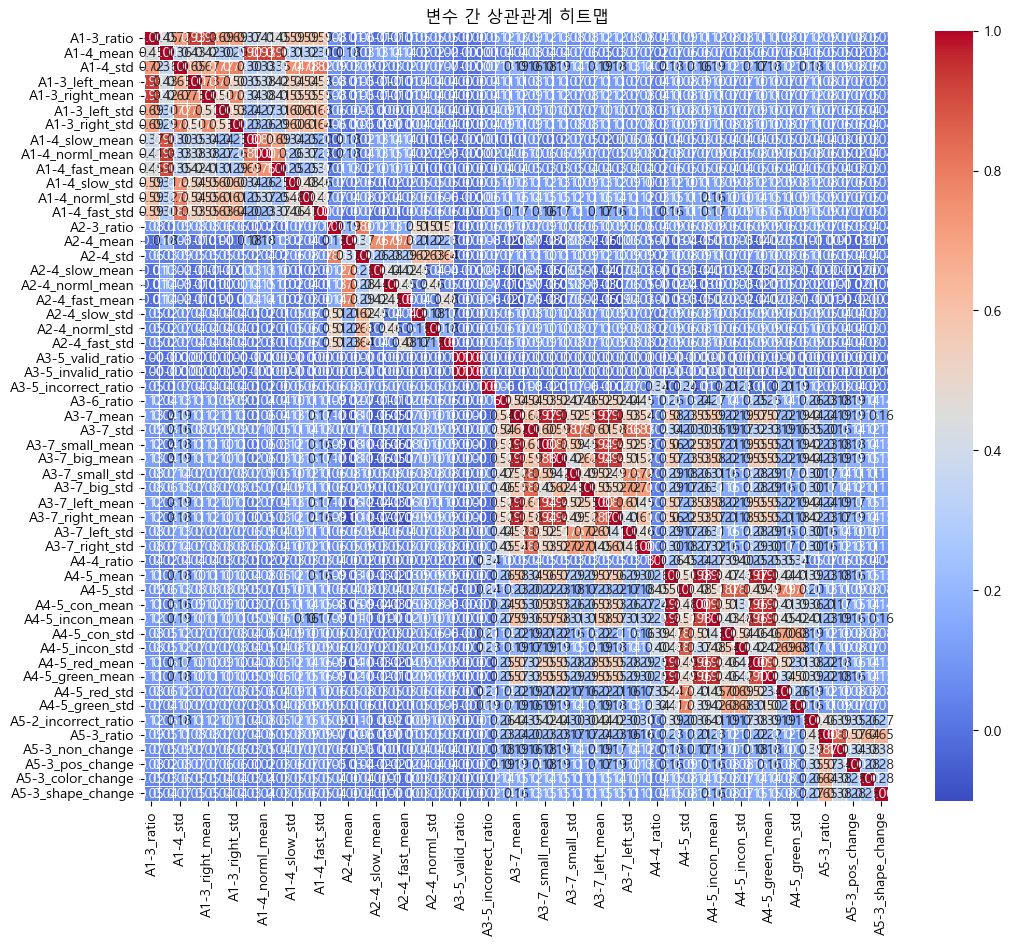

In [ ]:
# 상관관계 확인
# column = ['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1', 
#           'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5', 'Label']

corr_matrix = X_train_df.corr()

plt.figure(figsize = (12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap = 'coolwarm',
    fmt = '.2f',
    linewidths=.5
)
plt.title('변수 간 상관관계 히트맵')
plt.show()


In [ ]:
# 다중공선성 확인 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
numeric_features = X_train_df.select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data['feature'] = numeric_features.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

vif_data.sort_values(by = 'VIF', ascending=False)

,feature,VIF
6,A4-5,67.508523
4,A3-7,42.375935
0,Age,26.720384
8,A6-1,19.849710
9,A7-1,15.060327
13,A9-2,7.354342
7,A5-2,6.853604
12,A9-1,6.082420
15,A9-4,5.859456
16,A9-5,4.736142


#### (2) B자격검사

In [37]:
train_b_set['Age'] = train_b_set['Age'].apply(convert_age_to_numeric)

In [38]:
# 분석에 불필요한 변수 제거
X_train_df = train_b_set[['Age', 'B1-1', 'B1-3', 'B2-1', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 'B5-1', 'B5-2', 'B6',
                          'B7', 'B8', 'B9-2', 'B9-3', 'B9-5', 'B10-2', 'B10-3', 'B10-5', 'B10-6']]
y_train_df = train_b_set['Label']

In [39]:
# RandomForest를 활용한 특성 중요도 확인
rf_b_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_b_model.fit(X_train_df, y_train_df)

RandomForestClassifier(random_state=42)

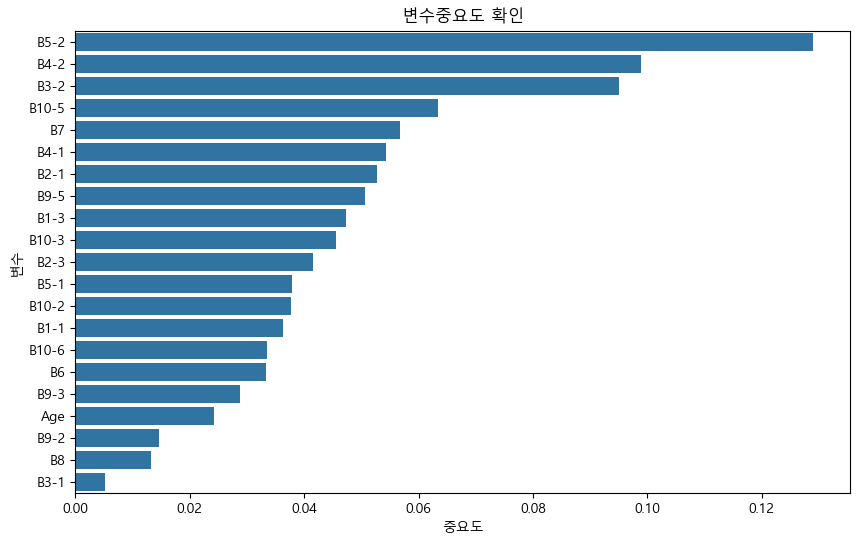

In [40]:
# 특성중요도 시각화
feature_importance = pd.Series(rf_b_model.feature_importances_, index = X_train_df.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('변수중요도 확인')
plt.xlabel('중요도')
plt.ylabel('변수')
plt.show()


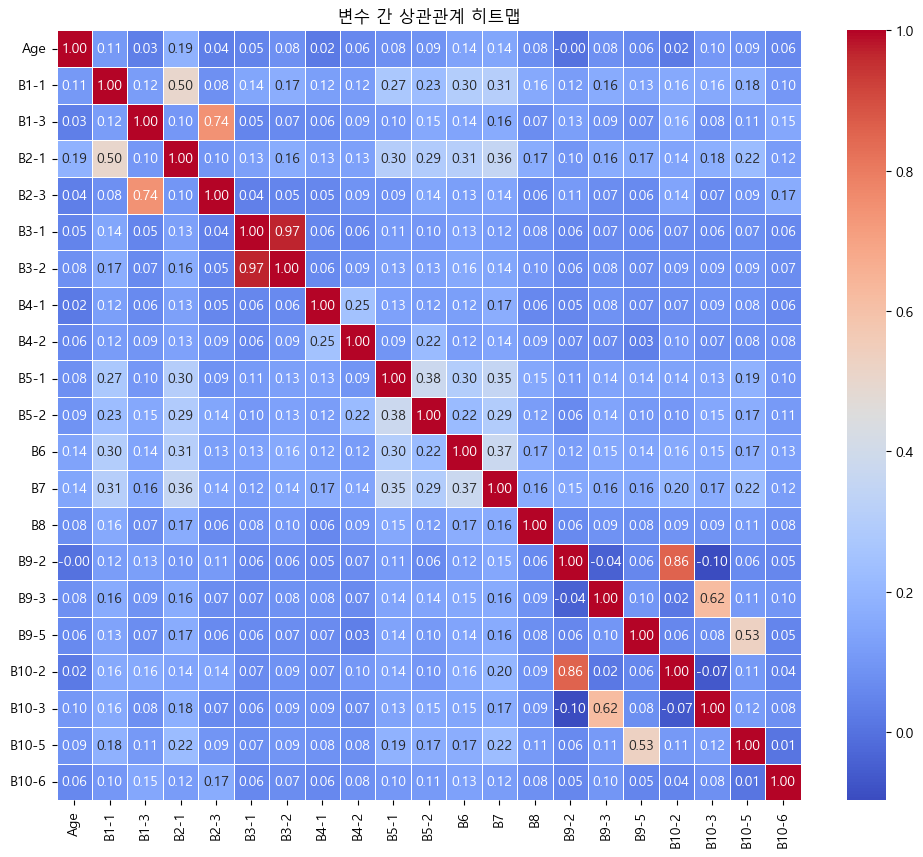

In [41]:
# 상관관계 확인
column = ['Age', 'B1-1', 'B1-3', 'B2-1', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 'B5-1', 'B5-2', 'B6',
            'B7', 'B8', 'B9-2', 'B9-3', 'B9-5', 'B10-2', 'B10-3', 'B10-5', 'B10-6']
corr_matrix = train_b_set[column].corr()

plt.figure(figsize = (12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap = 'coolwarm',
    fmt = '.2f',
    linewidths=.5
)
plt.title('변수 간 상관관계 히트맵')
plt.show()

In [42]:
# 다중공선성 확인 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
numeric_features = train_b_set[column].select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data['feature'] = numeric_features.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

vif_data.sort_values(by = 'VIF', ascending=False)

,feature,VIF
6,B3-2,53.277476
0,Age,52.317284
8,B4-2,22.828225
4,B2-3,20.167842
2,B1-3,19.294030
5,B3-1,16.988942
10,B5-2,16.380193
17,B10-2,5.185054
14,B9-2,4.305469
12,B7,4.051074


### 마) 로지스틱 Test

#### (1) Test1
- 가장 기본적인 테스트 수행결과 : 0, 1의 데이터 불균형으로 정확도는 97%이나 1에대해 전혀 예측을 못하는 모델

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.pipeline import make_pipeline


In [53]:
# A(신규자격) 로지스틱 회귀분석(base model)

X = X_train_df
y = y_train_df

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)


In [54]:
np.unique(y_train, return_counts=True)
# 0에 비해 1의 데이터가 터무니 없이 부족(데이터 불균형)

(array([0, 1], dtype=int64), array([442784,  10284], dtype=int64))

In [55]:
# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 학습
logic_model = LogisticRegression(C = 1.0, solver='saga', max_iter=1000, penalty='l2', random_state=42)
logic_model.fit(X_train_scaled, y_train)

# 모델 예측
y_pred = logic_model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logic_model.predict_proba(X_test_scaled)[:,1])
print(f'Accuracy : {accuracy:.4f}')
print("confusion_matrix : \n", conf_matrix)
print("classification_report : \n", class_report)
print(f"roc_auc_score : {roc_auc:.4f}")


c:\Users\cvcv6\anaconda3\envs\daycon\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy : 0.9773
confusion_matrix : 
 [[189764      1]
 [  4408      0]]
classification_report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    189765
           1       0.00      0.00      0.00      4408

    accuracy                           0.98    194173
   macro avg       0.49      0.50      0.49    194173
weighted avg       0.96      0.98      0.97    194173

roc_auc_score : 0.6114


#### Test2
- class_weight='balanced' 적용으로 1을 예측하기는 시작했지만, 기준이 낮아지면서 0도 1로 예측하는 비율이 많아짐

In [56]:
# class_weight 파라미터 사용

# A(신규자격)
column = ['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1',
          'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']
X = X_train_df
y = y_train_df

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)
# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 학습(class_weight)
logic_model = LogisticRegression(C = 1.0, 
                                 solver='saga', 
                                 max_iter=1000, 
                                 penalty='l2', 
                                 class_weight='balanced',
                                 random_state=42)
logic_model.fit(X_train_scaled, y_train)

# 모델 예측
y_pred = logic_model.predict(X_test_scaled)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logic_model.predict_proba(X_test_scaled)[:,1])
print(f'Accuracy : {accuracy:.4f}')
print("confusion_matrix : \n", conf_matrix)
print("classification_report : \n", class_report)
print(f"roc_auc_score : {roc_auc:.4f}")

c:\Users\cvcv6\anaconda3\envs\daycon\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy : 0.6306
confusion_matrix : 
 [[120082  69683]
 [  2050   2358]]
classification_report : 
               precision    recall  f1-score   support

           0       0.98      0.63      0.77    189765
           1       0.03      0.53      0.06      4408

    accuracy                           0.63    194173
   macro avg       0.51      0.58      0.42    194173
weighted avg       0.96      0.63      0.75    194173

roc_auc_score : 0.6128


#### Test3
- 

In [48]:
# 필요한 라이브러리 import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
# imbalanced-learn 라이브러리 설치가 필요할 수 있습니다: pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
import joblib

In [49]:
# B(자격유지)
# Assuming train_a_set, train_test_split, StandardScaler, etc. are defined and imported
column = ['Age', 'B1-1', 'B1-3', 'B2-1', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 'B5-1', 
          'B5-2', 'B6', 'B7', 'B8', 'B9-2', 'B9-3', 'B9-5', 'B10-2', 'B10-3', 'B10-5',
          'B10-6']
X = train_b_set[column]
y = train_b_set['Label']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)
# 데이터 정규화 (언더샘플링 전에 수행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 언더샘플링 적용 / RandomUnderSampler 사용
# This is correctly applied only to the training data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# --- CORRECTED CODE ---
# 로지스틱 회귀 모델 학습
logic_model = LogisticRegression(C = 0.01, 
                                 solver='saga', 
                                 max_iter=1000, 
                                 penalty='l2', 
                                 random_state=42,
                                 n_jobs=-1) # Added n_jobs for faster training
logic_model.fit(X_train_resampled, y_train_resampled)

# 모델 예측
y_pred = logic_model.predict(X_test_scaled)
pred_proba = logic_model.predict_proba(X_test_scaled)[:, 1]

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logic_model.predict_proba(X_test_scaled)[:,1])

# 모델 및 스케일러 저장
MODEL_DIR = "./model"
os.makedirs(MODEL_DIR, exist_ok=True)

model_path = os.path.join(MODEL_DIR, "logistic_model_B.pkl")
joblib.dump(logic_model, model_path)
print(f"✅ Model saved to: {model_path}")

scaler_path = os.path.join(MODEL_DIR, "scaler_B.pkl")
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved to: {scaler_path}")

print(f'Accuracy : {accuracy:.4f}')
print("Confusion Matrix : \n", conf_matrix)
print("Classification Report : \n", class_report)
print(f"ROC AUC Score : {roc_auc:.4f}")

✅ Model saved to: ./model\logistic_model_B.pkl
✅ Scaler saved to: ./model\scaler_B.pkl
Accuracy : 0.6142
Confusion Matrix : 
 [[53061 32417]
 [ 2016  1760]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.62      0.76     85478
           1       0.05      0.47      0.09      3776

    accuracy                           0.61     89254
   macro avg       0.51      0.54      0.42     89254
weighted avg       0.92      0.61      0.73     89254

ROC AUC Score : 0.5590


### ※ 평가체계

In [50]:
# 평가체계 준용
from evaluation import auc_brier_ece

answer_df = pd.DataFrame({
    'ID' : y_test.index,
    'Label' : y_test.values
})

submission_df = pd.DataFrame({
    'ID' : y_test.index,
    'Label' : pred_proba
})

try :
    combinded_score = auc_brier_ece(answer_df, submission_df)
    print(f"모델 최종 평가점수 : {combinded_score:.4f}")   
except ValueError as e:
    print(f"평가 중 오류 발생 : {e}")

모델 최종 평가점수 : 0.3959


In [51]:
# A(신규자격)
# Assuming train_a_set, train_test_split, StandardScaler, etc. are defined and imported
column = ['Age', 'A1-3', 'A2-3', 'A3-6', 'A3-7', 'A4-3', 'A4-5', 'A5-2', 'A6-1',
          'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']
X = train_a_set[column]
y = train_a_set['Label']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)
# 데이터 정규화 (언더샘플링 전에 수행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 언더샘플링 적용 / RandomUnderSampler 사용
# This is correctly applied only to the training data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# --- CORRECTED CODE ---
# 로지스틱 회귀 모델 학습
logic_model = LogisticRegression(C = 0.01, 
                                 solver='saga', 
                                 max_iter=1000, 
                                 penalty='l2', 
                                 random_state=42,
                                 n_jobs=-1) # Added n_jobs for faster training
logic_model.fit(X_train_resampled, y_train_resampled)

# 모델 예측
y_pred = logic_model.predict(X_test_scaled)
pred_proba = logic_model.predict_proba(X_test_scaled)[:, 1]

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logic_model.predict_proba(X_test_scaled)[:,1])

# 모델 및 스케일러 저장
MODEL_DIR = "./model"
os.makedirs(MODEL_DIR, exist_ok=True)

model_path = os.path.join(MODEL_DIR, "logistic_model_A.pkl")
joblib.dump(logic_model, model_path)
print(f"✅ Model saved to: {model_path}")

scaler_path = os.path.join(MODEL_DIR, "scaler_A.pkl")
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved to: {scaler_path}")

print(f'Accuracy : {accuracy:.4f}')
print("Confusion Matrix : \n", conf_matrix)
print("Classification Report : \n", class_report)
print(f"ROC AUC Score : {roc_auc:.4f}")

✅ Model saved to: ./model\logistic_model_A.pkl
✅ Scaler saved to: ./model\scaler_A.pkl
Accuracy : 0.6003
Confusion Matrix : 
 [[113692  76072]
 [  1544   2864]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.60      0.75    189764
           1       0.04      0.65      0.07      4408

    accuracy                           0.60    194172
   macro avg       0.51      0.62      0.41    194172
weighted avg       0.97      0.60      0.73    194172

ROC AUC Score : 0.6551


### 바) LightGBM 

In [52]:
import lightgbm 
from lightgbm import LGBMClassifier

# LightGBM 모델 적용
# Assuming train_a_set, train_test_split, StandardScaler, etc. are defined and imported
column = ['Age', 'B1-1', 'B1-3', 'B2-1', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 'B5-1', 
          'B5-2', 'B6', 'B7', 'B8', 'B9-2', 'B9-3', 'B9-5', 'B10-2', 'B10-3', 'B10-5',
          'B10-6']
X = train_b_set[column]
y = train_b_set['Label']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)
# 데이터 정규화 (언더샘플링 전에 수행)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 언더샘플링 적용 / RandomUnderSampler 사용
# This is correctly applied only to the training data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# --- CORRECTED CODE ---
# lightgbm 회귀 모델 학습
logic_model = LGBMClassifier(objective='binary', 
                        metric = 'auc', 
                        boosting_type='gbdt',
                        random_state=42)   
logic_model.fit(X_train_resampled, y_train_resampled)

# 모델 예측
y_pred = logic_model.predict(X_test_scaled)
pred_proba = logic_model.predict_proba(X_test_scaled)[:, 1]

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logic_model.predict_proba(X_test_scaled)[:,1])

# 모델 및 스케일러 저장
MODEL_DIR = "./model"
os.makedirs(MODEL_DIR, exist_ok=True)

model_path = os.path.join(MODEL_DIR, "lgbm_model_B.pkl")
joblib.dump(logic_model, model_path)
print(f"✅ Model saved to: {model_path}")

scaler_path = os.path.join(MODEL_DIR, "scaler_B.pkl")
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved to: {scaler_path}")

print(f'Accuracy : {accuracy:.4f}')
print("Confusion Matrix : \n", conf_matrix)
print("Classification Report : \n", class_report)
print(f"ROC AUC Score : {roc_auc:.4f}")

[LightGBM] [Info] Number of positive: 8812, number of negative: 8812
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 17624, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
✅ Model saved to: ./model\lgbm_model_B.pkl
✅ Scaler saved to: ./model\scaler_B.pkl
Accuracy : 0.5663
Confusion Matrix : 
 [[48662 36816]
 [ 1897  1879]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.57      0.72     85478
           1       0.05      0.50      0.09      3776

    accuracy                           0.57     89254
   macro avg       0.51      0.53      0.40     89254
weighted avg       0.92      0.57      0.69     

In [53]:
# 평가체계 준용
from evaluation import auc_brier_ece

answer_df = pd.DataFrame({
    'ID' : y_test.index,
    'Label' : y_test.values
})

submission_df = pd.DataFrame({
    'ID' : y_test.index,
    'Label' : pred_proba
})

try :
    combinded_score = auc_brier_ece(answer_df, submission_df)
    print(f"모델 최종 평가점수 : {combinded_score:.4f}")   
except ValueError as e:
    print(f"평가 중 오류 발생 : {e}")

모델 최종 평가점수 : 0.4046


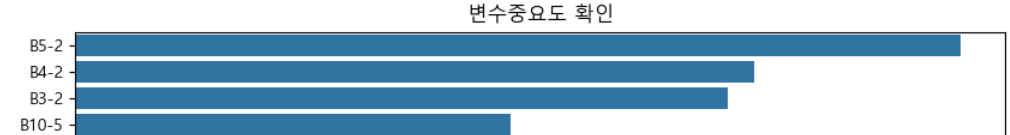

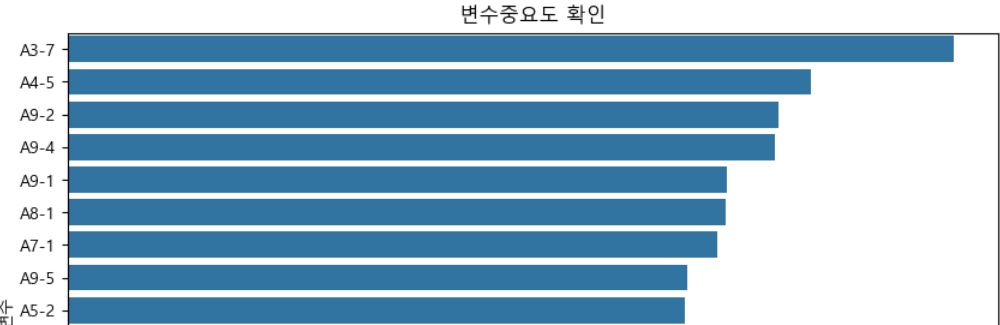

In [60]:
train_a_set

,Test_id,Test,PrimaryKey,Age,TestDate,A1-3,A2-3,A3-6,A3-7,A4-3,A4-5,A5-2,A6-1,A7-1,A8-1,A8-2,A9-1,A9-2,A9-3,A9-4,A9-5,Label
0,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,A,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,62,201801,0,0,0,1.56,2,0.75,10,5,10,6,1,4,11,1,6,5,0
1,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,A,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,42,201801,1,0,0,0.79,3,0.54,7,12,17,8,4,9,13,2,20,6,0
2,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,A,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,37,201801,0,0,0,0.74,0,0.57,11,10,14,0,1,6,2,0,0,2,0
3,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,A,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,52,201801,0,0,0,1.44,0,0.76,24,10,7,7,2,21,15,3,17,13,0
4,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,A,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,52,201801,0,0,0,1.21,3,0.60,8,11,15,3,0,6,18,7,18,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647233,0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...,A,0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...,42,202212,0,0,0,0.83,0,0.62,6,13,16,1,1,9,12,3,7,5,0
647234,0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...,A,0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...,37,202212,0,0,0,0.74,0,0.55,7,14,15,6,0,4,9,0,8,5,0
647235,0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...,A,0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...,37,202212,9,0,0,0.75,0,0.54,5,13,18,0,0,0,0,0,0,0,0
647236,0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...,A,0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...,42,202212,0,0,0,0.62,1,0.57,10,10,9,7,0,4,9,0,6,3,0


In [ ]:
import lightgbm 
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from evaluation import auc_brier_ece, expected_calibration_error

# column = ['A3-7', 'A4-5', 'A9-2', 'A9-4', 'A9-1', 'A8-1', 'A7-1', 'A9-5', 'A5-2']
X = train_a_set[column]
y = train_a_set['Label']

# k-fold 교차검증 훈련
N_splits = 5
skf = StratifiedKFold(n_splits=N_splits, shuffle=True, random_state = 42)

# 예측값 저장할 배열 초기화
oof_preds = np.zeros(len(X)) 
oof_labels = np.zeros(len(X))

# 모델만 저장
MODEL_DIR = "./model"
os.makedirs(MODEL_DIR, exist_ok=True)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"================== 폴드 {fold + 1} 시작 ==================")
    
    # 현재 폴드의 훈련 및 검증 세트로 데이터 분할
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # 모델 정의
    num_neg = (y_train == 0).sum()
    num_pos = (y_train == 1).sum()
    scale_pos_weight_value = num_neg / num_pos
    
    logic_model = LGBMClassifier(objective='binary', 
                            metric = 'auc', 
                            boosting_type='gbdt',
                            random_state=42,
                            scale_pos_weight = scale_pos_weight_value)   
    
    # 조기종료를 사용한 모델 훈련
    logic_model.fit(X_train_scaled, y_train,
                    eval_set = [(X_val_scaled, y_val)],
                    callbacks=[lightgbm.early_stopping(100, verbose=False)])

    # 전체 평가를 위한 out-of-fold 예측값과 실제 레이블 저장
    val_preds = logic_model.predict_proba(X_val_scaled)[:, 1]
    oof_preds[val_idx] = val_preds
    oof_labels[val_idx] = y_val
    
    # 현재 폴드의 모델 저장 
    model_path = os.path.join(MODEL_DIR, f"lgbm_model_A_fold{fold}.pkl")
    joblib.dump(logic_model, model_path)
    print(f"✅ 폴드 {fold + 1} 모델 저장 완료: {model_path}")

# oof 예측을 사용한 전체 모델 평가
print("\n======= 전체 oof 평가=========")
# 분류 지표를 위해 oof_labels를 정수형으로 변환
oof_labels_int = oof_labels.astype(int)
# 확률 0.5를 기준으로 이진 예측값 생성
oof_binary_preds = (oof_preds >= 0.5).astype(int)

accuracy = accuracy_score(oof_labels_int, oof_binary_preds)
conf_matrix = confusion_matrix(oof_labels_int, oof_binary_preds)
class_report = classification_report(oof_labels_int, oof_binary_preds)
roc_auc = roc_auc_score(oof_labels_int, oof_preds)

print(f'전체 OOF 정확도 (Accuracy) : {accuracy:.4f}')
print("전체 OOF 혼동 행렬 (Confusion Matrix) : \n", conf_matrix)
print("전체 OOF 분류 보고서 (Classification Report) : \n", class_report)
print(f"전체 OOF ROC AUC 점수 : {roc_auc:.4f}")
    




================== 폴드 1 시작 ==================
[LightGBM] [Info] Number of positive: 11754, number of negative: 506036
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 551
[LightGBM] [Info] Number of data points in the train set: 517790, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.022700 -> initscore=-3.762414
[LightGBM] [Info] Start training from score -3.762414
✅ 폴드 1 모델 저장 완료: ./model\lgbm_model_A_fold0.pkl
================== 폴드 2 시작 ==================
[LightGBM] [Info] Number of positive: 11753, number of negative: 506037
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 517790, number of used features: 9
[Light

In [59]:
# oof 예측을 사용한 전체 모델 평가
print("\n======= 전체 oof 평가=========")
# 분류 지표를 위해 oof_labels를 정수형으로 변환
oof_labels = oof_labels.astype(int)
# 확률 0.5를 기준으로 이진 예측값 생성
oof_binary_preds = (oof_preds >= 0.5).astype(int)

accuracy = accuracy_score(oof_labels, oof_binary_preds)
conf_matrix = confusion_matrix(oof_labels, oof_binary_preds)
class_report = classification_report(oof_labels, oof_binary_preds)
roc_auc = roc_auc_score(oof_labels, oof_preds)

print(f'전체 OOF 정확도 (Accuracy) : {accuracy:.4f}')
print("전체 OOF 혼동 행렬 (Confusion Matrix) : \n", conf_matrix)
print("전체 OOF 분류 보고서 (Classification Report) : \n", class_report)
print(f"전체 OOF ROC AUC 점수 : {roc_auc:.4f}")

# evaluation 모듈을 사용한 평가

# answer_df : 실제 레이블
answer_df = pd.DataFrame({
    'ID' : X.index,
    'Label' : oof_labels_int
})

# submission_df : 예측 확률
submission_df = pd.DataFrame({
    'ID' : X.index,
    'Label' : oof_preds
})

# 평가
try : 
    combinded_score = auc_brier_ece(answer_df, submission_df)
    print(f"전체 oof combined 평가 점수 : {combinded_score:.4f}")
except Exception as e :
    print(f"평가 중 오류 발생 : {e}")


======= 전체 oof 평가=========
전체 OOF 정확도 (Accuracy) : 0.7214
전체 OOF 혼동 행렬 (Confusion Matrix) : 
 [[460913 171633]
 [  8710   5982]]
전체 OOF 분류 보고서 (Classification Report) : 
               precision    recall  f1-score   support

           0       0.98      0.73      0.84    632546
           1       0.03      0.41      0.06     14692

    accuracy                           0.72    647238
   macro avg       0.51      0.57      0.45    647238
weighted avg       0.96      0.72      0.82    647238

전체 OOF ROC AUC 점수 : 0.5774
전체 oof combined 평가 점수 : 0.3504


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from xgboost import XGBClassifier

# A(신규자격)
X = X_train_df 
y = y_train_df

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# XGBoost는 트리 기반 모델이므로 데이터 스케일링 과정이 필수는 아닙니다.
# 따라서 StandardScaler 부분을 제외하고 바로 모델 학습을 진행할 수 있습니다.

# 클래스 불균형 처리를 위한 scale_pos_weight 계산
# scale_pos_weight = (0번 클래스 샘플 수) / (1번 클래스 샘플 수)
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)
print(f'scale_pos_weight: {scale_pos_weight:.2f}')

# XGBoost 모델 학습
xgb_model = XGBClassifier(
    n_estimators=1000,          # 부스팅 라운드 수 (트리의 개수)
    learning_rate=0.05,         # 학습률
    max_depth=5,                # 트리의 최대 깊이
    scale_pos_weight=scale_pos_weight, # 클래스 불균형 처리
    use_label_encoder=False,    # Scikit-learn 호환성 경고를 피하기 위함
    eval_metric='logloss',      # 평가 지표
    random_state=42,
    n_jobs=-1                   # 모든 CPU 코어 사용
)

# 조기 종료(Early Stopping)를 사용하여 최적의 트리 개수를 찾습니다.
# 검증 데이터(eval_set)에서 100 라운드 동안 성능 향상이 없으면 학습을 중단합니다.
xgb_model.fit(X_train, y_train, 
              early_stopping_rounds=100, 
              eval_set=[(X_test, y_test)], 
              verbose=100) # 100 라운드마다 학습 과정 출력

# 모델 예측
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nAccuracy : {accuracy:.4f}')
print("confusion_matrix : \n", conf_matrix)
print("classification_report : \n", class_report)
print(f"roc_auc_score : {roc_auc:.4f}")


scale_pos_weight: 43.06


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'